# Analyzing World Series Victories

<img src="https://upload.wikimedia.org/wikipedia/commons/4/49/1903_World_Series_-_Boston_Americans.jpg" width=400px>

### We need to import some libraries to perform our analysis

In [5]:
import pandas as pd
from scipy.special import binom
import matplotlib.pyplot as plt
import numpy as np

red,lime,blue,green,purple = "#CF5970","#94B848","#878CC0","#5EBAA1","#BD5DC7"
%config InlineBackend.figure_formats = ['svg']

## Take a peak at the World Series Data

In [2]:
ws = pd.read_csv('world_series_data.csv')
ws.tail(10)

,World Series Year,National League Team,NL Wins,American League Team,AL Wins,Total Games
98,2011,St. Louis Cardinals,4,Texas Rangers,3,7
99,2012,San Francisco Giants,4,Detroit Tigers,0,4
100,2013,St. Louis Cardinals,2,Boston Red Sox,4,6
101,2014,San Fransisco Giants,4,Kansas City Royals,3,7
102,2015,New York Mets,1,Kansas City Royals,4,5
103,2016,Chicao Cubs,4,Cleveland Indians,3,7
104,2017,Los Angeles Dodgers,3,Houston Astros,4,7
105,2018,Los Angeles Dodgers,1,Boston Red Sox,4,5
106,2019,Washington Nationals,4,Louston Astros,3,7
107,2020,Los Angeles Dodgers,4,Tampa Bay Rays,2,6


## Distribution of wins by team: American League

Text(0.5, 1.0, 'American League')

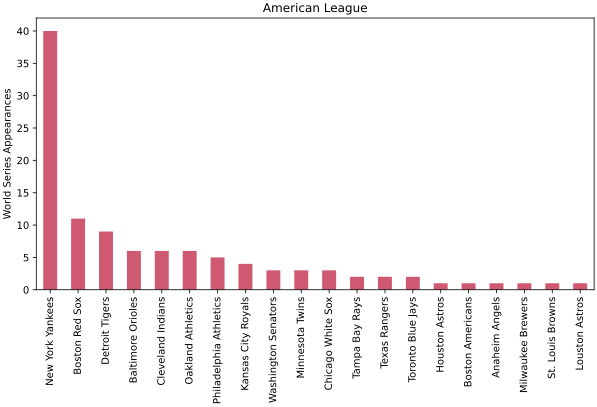

In [3]:
plt.figure(figsize=(10,5))
h = ws["American League Team"].value_counts().plot.bar(color=red)
h.set_ylabel('World Series Appearances')
h.set_title('American League')

## Distribution of wins by team: National League

Text(0.5, 1.0, 'National League')

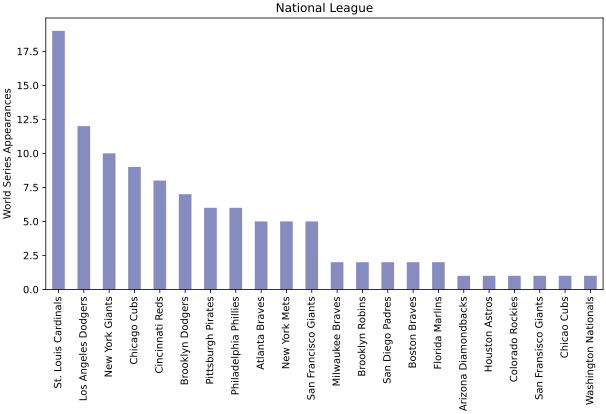

In [4]:
plt.figure(figsize=(10,5))
h = ws["National League Team"].value_counts().plot.bar(color=blue)
h.set_ylabel('World Series Appearances')
h.set_title('National League')

## Are teams from one league better than the other?

The *probability of winning* based on the available data is given by:

\begin{equation}
P(\text{League Win}) = \frac{\text{Num. of Wins}}{\text{Total Num. Games}}
\end{equation}

In [5]:
total_number_games = ws["Total Games"].sum()
al_wins = ws["AL Wins"].sum()
nl_wins = ws["NL Wins"].sum()

print(f'AL Win Probability: {100*al_wins/total_number_games:.2f}%')
print(f'NL Win Probability: {100*nl_wins/total_number_games:.2f}%')

AL Win Probability: 54.69%
NL Win Probability: 45.31%


Remember, probability is the likliehood **on average** of a given outcome occuring.

### It seems that the American League is slightly better.  Any ideas why?

## What is the probability of each World Series outcome?

In a *best of seven* series there are 4 possible outcomes:

* 4-0 (sweep)
* 4-1
* 4-2
* 4-3

These correspond to 4, 5, 6, and 7 games respectively.

Each of these outcomes could happen in 2 distinct ways if we neglect ordering, *i.e.* either the American League or National Team could win the world series. 

We can quantify this by counting how may times each of the oucomes appears and dividing by the total number of series. The result is called a **probability histogram**

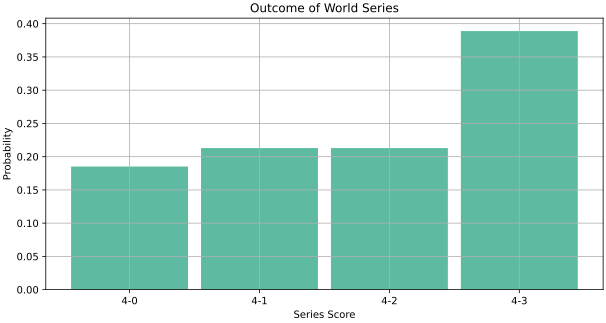

In [6]:
plt.figure(figsize=(10,5))
h = ws['Total Games'].hist(range=[4,7],bins=[4,5,6,7,8],align='left',rwidth=0.9, density=True, color=green)
plt.xticks(np.arange(4,8), ('4-0', '4-1', '4-2', '4-3') )

# add a title to the current figure, our histogram
h.set_title("Outcome of World Series")
h.set_xlabel("Series Score")
h.set_ylabel("Probability")

# record the data for future plotting
ws_actual,binEdges = np.histogram(ws['Total Games'],bins=4, density=True)
ws_actual_prob = pd.Series(ws_actual, index=['4-0','4-1','4-2','4-3'], name='World Series')

## Questions
 * Can we undertsand this distribution?
 * Why do most series go to the full 7 games?
 * Why is 4-0 (a sweep) the most unlikely outcome?

## Can we simplify this problem and analyze/collect our own data for a *model* system

### Activity: Odds-n-Evens

 1. Get into groups of 3 (2 active players 1 umpire)
 2. There are 3 possible *series* per group 
 3. For each series, decide who is American League (**EVENS**) and who is National League (**ODDS**)
 3. Play **best 4 out of 7** games of O/E. 
 5. The umpire needs to recored (1) the **winner (A or N)** and (2) the **length** of the series (4, 5, 6, or 7 games).
 

In [7]:
oe_game_lengths = [4,4,5,4,5,5,6,4,6,6,4,7,7,7,7,7,7,4,5,7]
oe_game_winners = ['E','O','E','E','O','E','O','E','O','E','O','E','O','E','E','O','O','E','O','O']

data = {'Series Length':oe_game_lengths, 'Winners':oe_game_winners}
odds_evens = pd.DataFrame(data)

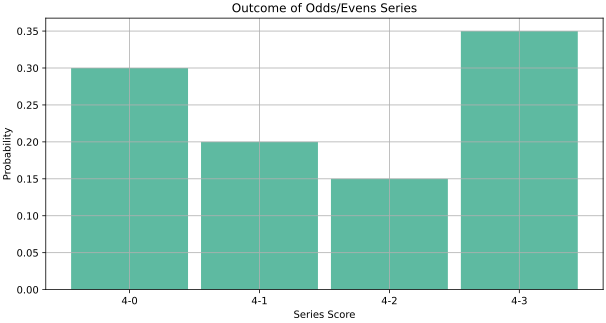

In [8]:
plt.figure(figsize=(10,5))
h = odds_evens['Series Length'].hist(range=[4,7],bins=[4,5,6,7,8],align='left',rwidth=0.9, density=True, color=green)
plt.xticks(np.arange(4,8), ('4-0', '4-1', '4-2', '4-3') )

h.set_title("Outcome of Odds/Evens Series")
h.set_xlabel("Series Score")
h.set_ylabel("Probability")

# Record the probabilities
oe_actual,binEdges = np.histogram(odds_evens['Series Length'],bins=4, density=True)
oe_actual_prob = pd.Series(oe_actual, index=['4-0','4-1','4-2','4-3'], name='Odds & Evens')

In [9]:
print(oe_actual_prob,'\n')
print(ws_actual_prob)

4-0    0.400000
4-1    0.266667
4-2    0.200000
4-3    0.466667
Name: Odds & Evens, dtype: float64 

4-0    0.185185
4-1    0.212963
4-2    0.212963
4-3    0.388889
Name: World Series, dtype: float64


### Is there anything special about the American vs. National League in our Data?

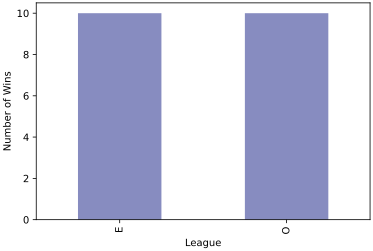

In [10]:
h = odds_evens['Winners'].value_counts().plot.bar(color=blue,xlabel='League', ylabel='Number of Wins')

## Question: How can we compute the probability and see if it agrees with our experiment?

<!--
**Answer**: First enumerate the number of outcomes in each case:
  * 4-0: AAAA, NNNN
  * 4-1: NAAAA, ANAAA, AANAA, AAANA -- One party needs to win **at most** 1 out of the first 4 games
-->

## We can write code to enumerate these for us!

In [11]:
import itertools as it
outcome,prob,combos = {},{},{}

### 4-0 Sweep

In [12]:
outcome['4-0'] = ["AAAA","NNNN"]

### 4-1

In [13]:
# AL wins 4-1
score = set(it.permutations("AAAN"))
outcome['4-1'] = [ "".join(c) + "A" for c in score]

# NL wins 4-1
score = set(it.permutations("NNNA"))
outcome['4-1'] += [ "".join(c) + "N" for c in score]

### 4-2

In [14]:
# AL wins 4-2
score = set(it.permutations("AAANN"))
outcome['4-2'] = [ "".join(c) + "A" for c in score]

# NL wins 4-2
score = set(it.permutations("NNNAA"))
outcome['4-2'] += [ "".join(c) + "N" for c in score]

### 4-3

In [15]:
# AL wins 4-3
score = set(it.permutations("AAANNN"))
outcome['4-3'] = [ "".join(c) + "A" for c in score]

# NL wins 4-3
score = set(it.permutations("NNNAAA"))
outcome['4-3'] += [ "".join(c) + "N" for c in score]

## Now let's determine the probabilities

 * We have to remember that the probability to win a single game is equal to 1/2
 * Therefore, the probability of given outcome is equal to the number of ways for that score to happen, divided by: $2^{\text{number of games}}$

### List all the posibile combinations

In [16]:
for score,out in outcome.items():
    combos[score] = pd.DataFrame({score:out})

In [17]:
combos['4-0']

,4-0
0,AAAA
1,NNNN


In [18]:
combos['4-1']

,4-1
0,AAANA
1,AANAA
2,ANAAA
3,NAAAA
4,NNANN
5,ANNNN
6,NANNN
7,NNNAN


In [19]:
combos['4-2']

,4-2
0,AANANA
1,NANAAA
2,NNAAAA
3,AAANNA
4,ANANAA
5,ANNAAA
6,AANNAA
7,NAANAA
8,NAAANA
9,ANAANA


In [20]:
combos['4-3']

,4-3
0,NAAANNA
1,NANNAAA
2,NNANAAA
3,ANANANA
4,NAANANA
5,ANAANNA
6,ANNAANA
7,AAANNNA
8,NANAANA
9,NNAAANA


### To determine the probability:

$$ \text{Prob(outcome)} = \frac{\text{number outcomes}}{2^{\text{number games}}} $$

In [21]:
for score,out in outcome.items():
    prob[score] = 1.0*len(out)/(2**(len(out[0])))
exact_prob = pd.Series(prob, name='Exact Prob.')

### Let's compare the exact probability we have measured, with the observed

In [22]:
exact_prob

4-0    0.1250
4-1    0.2500
4-2    0.3125
4-3    0.3125
Name: Exact Prob., dtype: float64

In [23]:
ws_actual_prob

4-0    0.185185
4-1    0.212963
4-2    0.212963
4-3    0.388889
Name: World Series, dtype: float64

In [24]:
oe_actual_prob

4-0    0.400000
4-1    0.266667
4-2    0.200000
4-3    0.466667
Name: Odds & Evens, dtype: float64

### These look pretty close, let's compare on a plot

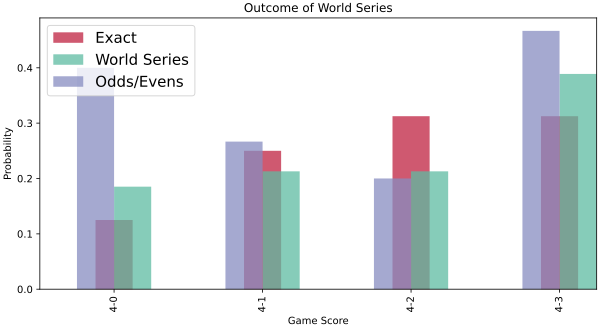

In [25]:
plt.figure(figsize=(10,5))
exact_prob.plot.bar(alpha=1, color=red, label='Exact', width=0.25, position=0.5)
ws_actual_prob.plot.bar(alpha=0.75, color=green, label='World Series', width=0.25, position=0)
oe_actual_prob.plot.bar(alpha=0.75, color=blue, label='Odds/Evens',width=0.25, position=1)

plt.title("Outcome of World Series")
plt.xlabel("Game Score")
plt.ylabel("Probability")
plt.legend(loc='upper left', fontsize=15)

# Success!

### It turns out, this is an example of the binomial probability distribution for the special case where each of the two outcomes is equally likely.

The binomial distribution is the discrete probability distribution of the number of successes in a sequence of n independent yes/no experiments, each of which yields success with probability p.

See more: http://en.wikipedia.org/wiki/Binomial_distribution

$$P_b(n,k) = \binom{n}{k} \frac{1}{2^n}$$

Let's try to reproduce our previous calculation.  In our case, we will use the binomial probability for the first $n-1$ games of a $n$ game series, then multiply by $1/2$ the probability of our team winning the final game and finally, multiply the whole thing by $2$ as we don't care whether the AL or NL wins.  Thus, our probability is:

$$P(a,0) = P_b(a,0) \times 2 $$
$$P(a,b>0) = P_b(a+b-1,3) \times \frac{1}{2} \times 2 $$

In [26]:
def P(a,b):
    ''' The probability for a series outcome a-b. '''
    if b == 0:
        return (binom(a,b)/2**a) * 2
    else:
        return binom(a+b-1,3)/2**(a+b-1)

In [27]:
exact_prob

4-0    0.1250
4-1    0.2500
4-2    0.3125
4-3    0.3125
Name: Exact Prob., dtype: float64

In [28]:
for b in range(4):
    print (f'P(4-{b}) = {P(4,b)}')

P(4-0) = 0.125
P(4-1) = 0.25
P(4-2) = 0.3125
P(4-3) = 0.3125


In [10]:
import scipy,matplotlib
print(np.__version__)
print(scipy.__version__)
print(pd.__version__)
print(matplotlib.__version__)

1.21.1
1.7.0
1.3.2
3.4.2
